In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/delhi_climate/train.csv', delimiter=',')
test = pd.read_csv('/content/drive/MyDrive/delhi_climate/test.csv', delimiter=',')

### Train data

In [ ]:
train.shape

(1462, 5)

In [ ]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
train.info()
train.isnull().sum().sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### Test data

In [ ]:
test.shape

(114, 5)

In [ ]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [ ]:
test.info()
test.isnull().sum().sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# Data Vizualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.concat([train, test], ignore_index=True)

In [ ]:
corr = train.corr(method="pearson")
corr.style.background_gradient(cmap="coolwarm")

<ipython-input-14-ae1a366c9911>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr(method="pearson")


,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


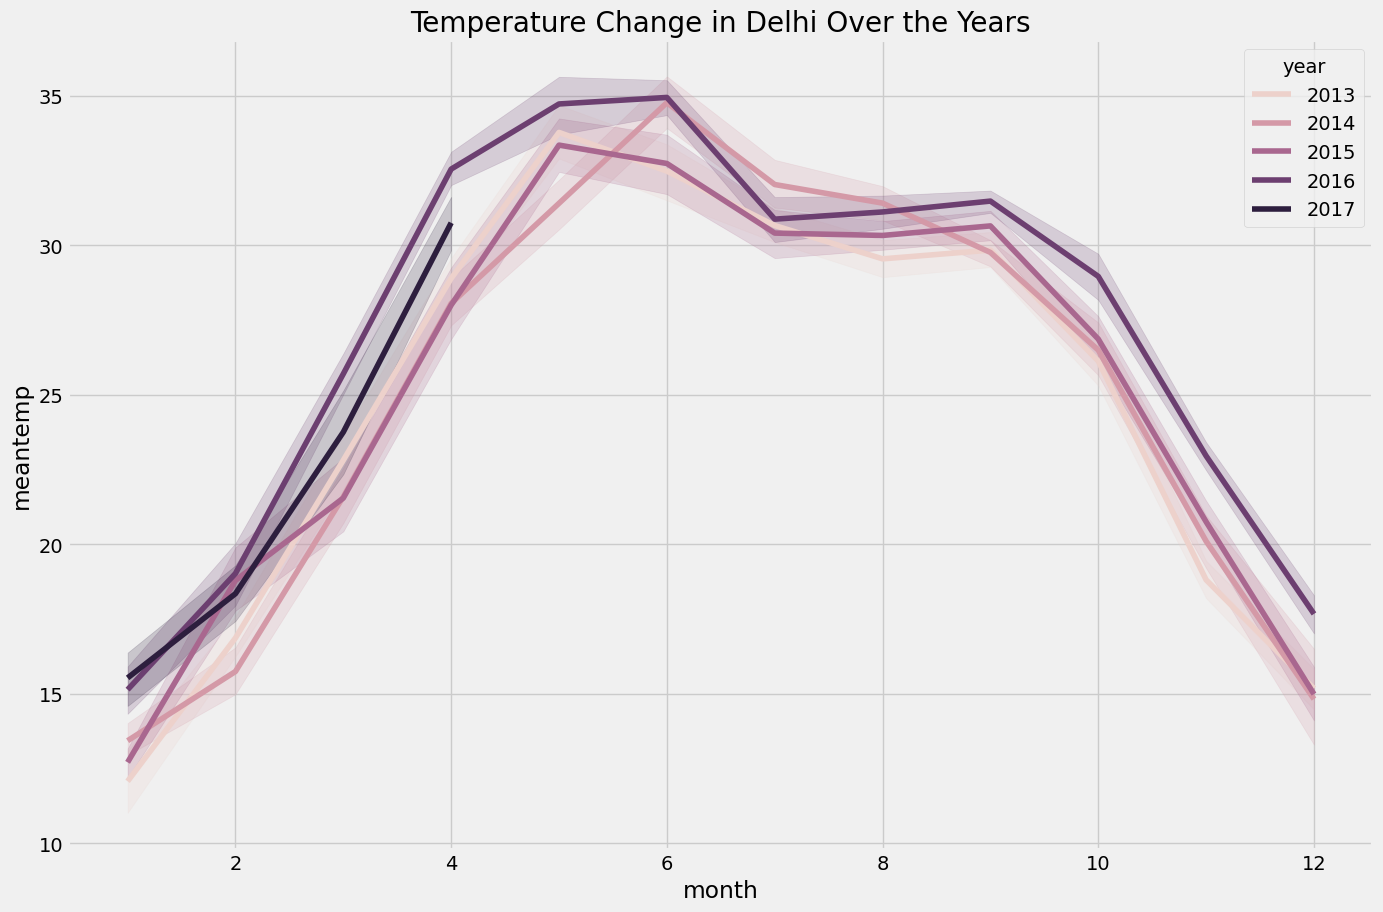

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [ ]:
figure = px.line(data, x="date",
                 y="humidity",
                 title='Humidity in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.line(data, x="date",
                 y=["meantemp", "humidity", "wind_speed"],
                 title="MEANTEMP VS HUMIDITY VS WIND SPEED")
figure.update_traces(mode="markers+lines")
figure.update_xaxes(title_text="Date")
figure.update_yaxes(title_text="Value")
figure.show()


In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
print(forecast_data)

             ds          y   humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1
...         ...        ...        ...         ...           ...   ...    ...
1571 2017-04-20  34.500000  27.500000    5.562500    998.625000  2017      4
1572 2017-04-21  34.250000  39.375000    6.962500    999.875000  2017      4
1573 2017-04-22  32.900000  40.900000    8.890000   1001.600000  2017      4
1574 2017-04-23  32.875000  27.500000    9.962500   1002.125000  2017      4
1575 2017-04-24  32.000000  27.142857   12.157143   1004.142857  2017      4

[1576 rows x 7 columns]


In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet(daily_seasonality=True)
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptohde87i/99uhxq68.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptohde87i/t6vzjnaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11196', 'data', 'file=/tmp/tmptohde87i/99uhxq68.json', 'init=/tmp/tmptohde87i/t6vzjnaa.json', 'output', 'file=/tmp/tmptohde87i/prophet_modelmhaozdd2/prophet_model-20231022172352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:23:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:23:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
